In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [73]:
import matplotlib.pyplot as plt

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.experimental import RMSprop, Adam
import gc
import random

tf.keras.utils.set_random_seed(42)

In [74]:
tf. __version__

'2.9.2'

In [75]:
def ReSize(image, size):
    resizedimg=cv2.resize(image,(size,size))
    return resizedimg 

def normalize(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img1=cv2.cvtColor(img_normalized,cv2.COLOR_BGR2RGB)
    return img1    

def gray(normimg):
    img=cv2.cvtColor(normimg, cv2.COLOR_BGR2GRAY)
    grey=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return grey

def Brightnessandcontrast(normimg):
    Bright = 20
    Contrast = 1
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    adjusted = cv2.convertScaleAbs(img, alpha=Contrast, beta=Bright)
    rgbadjusted=cv2.cvtColor(adjusted,cv2.COLOR_BGR2RGB)
    return rgbadjusted

def mean_noise_reduction(normimg):
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    filteredimg = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    return rgbfilteredimg

def three_noise_reduction(normimg):
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    filteredimg =cv2.GaussianBlur(img,(5,5),0)
    #filteredimg=cv2.blur(img,(5,5))
    #filteredimg=cv2.medianBlur(img,5)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    return rgbfilteredimg

In [83]:

def read_data(list, photo_size):  
    data = []
    for i in range(len(list)):
        for filename in os.listdir(list[i]):
            img  = cv2.imread(list[i] + filename)
            img = ReSize(img, photo_size)
            img = normalize(img)
            #img = gray(img)
            #img = Brightnessandcontrast(img)
            #img = mean_noise_reduction(img)
            img = three_noise_reduction(img)
            data.append([img, [i%2, abs(i%2 - 1)] ])
    
    random.shuffle(data)
    
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    
    x = np.array(x)
    y = np.array(y)
    #x = x / 255
    return x, y

In [84]:
"""import random
def read_data(list, photo_size = 256, valid_flag = False):  
    data = []
    for i in range(len(list)):
        for filename in os.listdir(list[i]):
            img  = cv2.imread(list[i] + filename)
            img = cv2.resize(img,(photo_size,photo_size))
            
            if filename.find("Non_Autistic") !=-1:
                data.append([img, [0,1]])
            elif filename.find("Autistic")!=-1:
                data.append([img, [1,0]])
            #for valid data
            elif list[i].find("Non_Autistic")!=-1:
                data.append([img, [0,1]])
            else:
                data.append([img, [1,0]])
    
    random.shuffle(data)
    if valid_flag:
        return data
    
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    
    x = np.array(x)
    y = np.array(y)
    x = x / 255
    return x, y


train_add_autis = "/kaggle/input/autism-image-data/AutismDataset/train/"

X_train, y_train = read_data([train_add_autis])

X_test, y_test = read_data(["/kaggle/input/autism-image-data/AutismDataset/test/"])

na = "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/"
a = "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/"

x_v, y_v = read_data([na, a])"""

'import random\ndef read_data(list, photo_size = 256, valid_flag = False):  \n    data = []\n    for i in range(len(list)):\n        for filename in os.listdir(list[i]):\n            img  = cv2.imread(list[i] + filename)\n            img = cv2.resize(img,(photo_size,photo_size))\n            \n            if filename.find("Non_Autistic") !=-1:\n                data.append([img, [0,1]])\n            elif filename.find("Autistic")!=-1:\n                data.append([img, [1,0]])\n            #for valid data\n            elif list[i].find("Non_Autistic")!=-1:\n                data.append([img, [0,1]])\n            else:\n                data.append([img, [1,0]])\n    \n    random.shuffle(data)\n    if valid_flag:\n        return data\n    \n    x = []\n    y = []\n    for i in range(len(data)):\n        x.append(data[i][0])\n        y.append(data[i][1])\n    \n    x = np.array(x)\n    y = np.array(y)\n    x = x / 255\n    return x, y\n\n\ntrain_add_autis = "/kaggle/input/autism-image-data/

In [85]:
ta = "/kaggle/input/autistic-children-facial-data-set/train/autistic/"
tn = "/kaggle/input/autistic-children-facial-data-set/train/non_autistic/"
testa = "/kaggle/input/autistic-children-facial-data-set/test/autistic/"
testn = "/kaggle/input/autistic-children-facial-data-set/test/non_autistic/"
va = "/kaggle/input/autistic-children-facial-data-set/valid/autistic/"
vn = "/kaggle/input/autistic-children-facial-data-set/valid/non_autistic/"

lis = [tn, ta , testn, testa, vn, va]


x, y = read_data(lis , 256)
print(x.shape)
print(y.shape)

del ta , tn , testa, testn, va, vn, lis

gc.collect()

(2936, 256, 256, 3)
(2936, 2)


15

In [86]:
y.sum(axis = 0)

array([1468, 1468])

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9, test_size = 0.1, stratify = y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size = 0.1, stratify = y_train)
del x, y
gc.collect()

46

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(2377, 256, 256, 3)
(2377, 2)
(294, 256, 256, 3)
(294, 2)
(265, 256, 256, 3)
(265, 2)


In [89]:
def make_model(size):
    xception = tf.keras.applications.Xception(input_shape=(size, size,3), include_top=False, weights="imagenet" )
    
    model = tf.keras.models.Sequential([
    xception,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(2, "softmax")
    ])
    
    model.compile(
      optimizer="RMSprop",
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=['acc'])    
    return model

In [105]:
gc.collect()
model = make_model(256)
gc.collect()
histroy = model.fit(x_train, y_train,validation_data = [x_valid, y_valid], epochs = 30)
gc.collect()

Epoch 1/30
75/75 [==============================] - 48s 520ms/step - loss: 0.5298 - acc: 0.7501 - val_loss: 6.7612 - val_acc: 0.5170
Epoch 2/30
75/75 [==============================] - 38s 502ms/step - loss: 0.4092 - acc: 0.8187 - val_loss: 15.0671 - val_acc: 0.5019
Epoch 3/30
75/75 [==============================] - 38s 502ms/step - loss: 0.3118 - acc: 0.8637 - val_loss: 1.8995 - val_acc: 0.6792
Epoch 4/30
75/75 [==============================] - 38s 502ms/step - loss: 0.2025 - acc: 0.9222 - val_loss: 1.2110 - val_acc: 0.8075
Epoch 5/30
75/75 [==============================] - 38s 502ms/step - loss: 0.1540 - acc: 0.9432 - val_loss: 58.1871 - val_acc: 0.5132
Epoch 6/30
75/75 [==============================] - 38s 502ms/step - loss: 0.1067 - acc: 0.9609 - val_loss: 1.9407 - val_acc: 0.8038
Epoch 7/30
75/75 [==============================] - 38s 501ms/step - loss: 0.1070 - acc: 0.9634 - val_loss: 0.7889 - val_acc: 0.8415
Epoch 8/30
75/75 [==============================] - 38s 502ms/step 

17502

In [107]:
gc.collect()
print("train:")
model.evaluate(x_train, y_train)
print("valid:")
model.evaluate(x_valid, y_valid)
print("test:")
model.evaluate(x_test, y_test)

gc.collect()

train:
75/75 [==============================] - 8s 102ms/step - loss: 0.4915 - acc: 0.8940
valid:
9/9 [==============================] - 1s 95ms/step - loss: 2.6532 - acc: 0.7472
test:
10/10 [==============================] - 1s 94ms/step - loss: 2.0248 - acc: 0.7891


2036

In [92]:
histroy.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

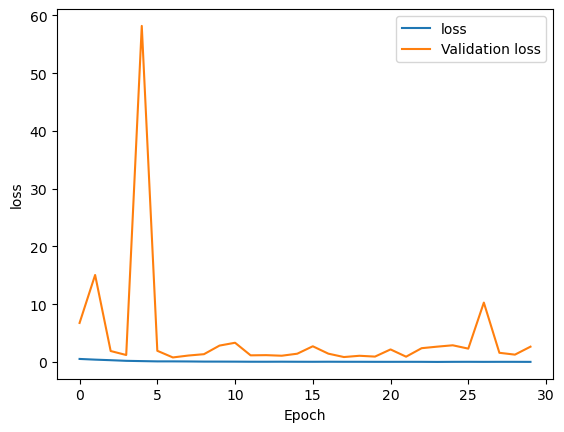

In [109]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
#plt.ylim(0 , 1)
#plt.xlim(0 , 28 , 1)
plt.legend(["loss","Validation loss","loss","Validation Loss"])
plt.show()